# Relationship between the probit and the logistic

> Stats stackexchange answer to [this](https://stats.stackexchange.com/questions/483552/relationship-between-a-logistic-decision-function-and-gaussian-noise/484898#484898) question.

The first way to model the value $p_1(x)$ is via the sigmoid function; the second way to model it, namely $p_2(x)$, is called the *probit* function.

They are not intimately related per se, i.e., one cannot *naturally* get from the sigmoid to the probit or vice-versa. However, the probit function can be used as an approximation to the sigmoid function. In fact, the two functions are closest, around $x=0$, when $p_1(x)$ is approximated by $p_2$ as $p_2\left(\sqrt{\frac{\pi}{8}}x\right)$.

This is useful, for instance, in the context of bayesian logistic regresion, where we are required to solve an integral of the form

$$
    \int_{\mathbb{R}} p_1(x) \mathcal{N}(-x\vert\mu_x, \sigma_x) dx
$$

Using the sigmoid function $p_1(x)$ makes the integral intractable, but we can make a variational approximation to the integral considering $p_2\left(\sqrt{\frac{\pi}{8}}x\right)$, which turns the problem into a convolution of Gaussians, hence, it has a closed-form solution.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%config InlineBackend.figure_format = "retina"

In [3]:
N = norm()

In [6]:
x = np.linspace(-5, 5, 100)

In [13]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

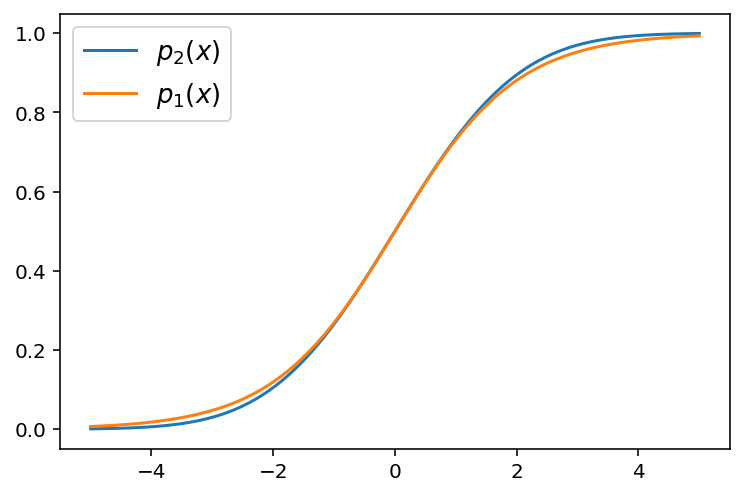

In [20]:
lmbda = np.sqrt(np.pi / 8)

plt.plot(x, N.cdf(x * lmbda), label="$p_2(x)$")
plt.plot(x, sigma(x), label="$p_1(x)$")
plt.legend(fontsize=13)